# Computer Vision Project
#### - By Dishant Singh -

### 1. Importing Modules
First of all importing all the required python modules for this project.

In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

### 2. Fetching FMNIST Dataset
Seperating our FMNIST(Fashion MNIST is a large dataset containing alots of fashion images with labels from 0 to 9) dataset into training data, its labels and testing data and ists labels and storing them in particular variable as numpy array.

In [2]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.fashion_mnist.load_data()

4422102/4422102 [==============================] - 0s 0us/step


### 3. Checking Data
Checking our data by taking out random sample data and printng their array and image visulaization using matplotlib library and normalizing the pixel value by dividing the array of values by 255. 

The sample image with label: 9
The sample image with data: [[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   2   0   0 180 183  70  39   0   0   0   0  72  93 121  22   0   2]
 [  0   0   0   0   0   0   0   0   0   0   0   3   0   0 197 230 230 255 247 237 217 223 237 238 249  53   0   5]
 [  0   0   0   0   0   0   0   0   0   0   0   4   0   0 197 211 218 218 227 234 234 230 221 216 224  11   0   2]
 [  0   0   0   0   0   0   0   0   0   1   0   5   0   5 214 214 221 220 221 216 221 225 223 222 227  18   0   3]
 [  0   0   0   0   0

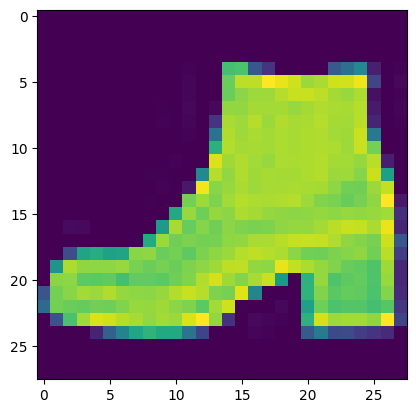

In [3]:
# taking image index for sample data
image_index = 122

# for better and broad visualization of the values of np array
np.set_printoptions(linewidth = 320)
print(f"The sample image with label: {y_train[image_index]}")
print(f"The sample image with data: {x_train[image_index]}")
print(f"The real Imgage: {plt.imshow(x_train[image_index])}")

# normalizing the training and testing data
training_data = x_train / 255
testing_data = x_test / 255

### 4. Defining Model
Now using TensorFlow to create Nural Network in sequence and adding Convolution layers for applying filters for better classification of objects and adding max pooling to decrease image size by half. Applying one more convolution and pooling layer to our nural net. Lastly converting the 2d array to a 1d array using Flatten layer with no arguments and then adding a Dense hidden layer with 128 size and ReLU as activation function. Lastly adding the output Dense layer with softmax function.

In [4]:
model = tf.keras.Sequential([
    # adding convolutions to the model
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(28, 28, 1)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation = tf.nn.relu),
    tf.keras.layers.Dense(10, activation = tf.nn.softmax) # output layer
])

### 5. Compiling Model
Setting our model using Adam method as model optimizer this is used to decrese the loss of the model per epoch during the model training. Sparse Categorical Crossentropy as loss is used to evaluate how good the model is doing on the Dataset and Lastly we have used Accuracy as the metrics to check how accurate our model is every time it is given a data.

In [5]:
model.compile(optimizer = "adam", loss = "sparse_categorical_crossentropy", metrics = ["accuracy"])

### 6. Training Model
Now after compiling the model we will the train the model on our dataset so we have used fit() method and gave training data and the labels. We have defined 10 epochs which means the model will be trained with the same data for 10 times to increse the overall accuracy.

In [6]:
model.fit(training_data, y_train, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 32s 16ms/step - loss: 0.4716 - accuracy: 0.8279
Epoch 2/10
1875/1875 [==============================] - 30s 16ms/step - loss: 0.3233 - accuracy: 0.8808
Epoch 3/10
1875/1875 [==============================] - 30s 16ms/step - loss: 0.2772 - accuracy: 0.8991
Epoch 4/10
1875/1875 [==============================] - 30s 16ms/step - loss: 0.2488 - accuracy: 0.9089
Epoch 5/10
1875/1875 [==============================] - 30s 16ms/step - loss: 0.2218 - accuracy: 0.9172
Epoch 6/10
1875/1875 [==============================] - 30s 16ms/step - loss: 0.2017 - accuracy: 0.9251
Epoch 7/10
1875/1875 [==============================] - 30s 16ms/step - loss: 0.1815 - accuracy: 0.9329
Epoch 8/10
1875/1875 [==============================] - 30s 16ms/step - loss: 0.1667 - accuracy: 0.9361
Epoch 9/10
1875/1875 [==============================] - 30s 16ms/step - loss: 0.1512 - accuracy: 0.9434
Epoch 10/10
1875/1875 [==============================] - 30s 16m

### 7. Testing Model
Now it is the time for testing our model on the test data that we have earlier fetched from the FMNIST dataset and checking how accurate our model is on completely new data that the model have never seen before.

In [7]:
model.evaluate(testing_data, y_test)

313/313 [==============================] - 2s 5ms/step - loss: 0.2826 - accuracy: 0.9030


[0.28255733847618103, 0.902999997138977]